In [1]:
import numpy as np  
from scipy.optimize import minimize
import matplotlib.pyplot as plt 

In [2]:
def logistic_function(x, slope, midpoint, scale):
    """Takes slope max and midpoint.  """
    val = scale / (1 + np.exp(slope * (x - midpoint)))
    return val   
    

### Data found in Rebeccas BA

In [3]:
data_hct = np.array([0.1,0.2,0.3,0.4])
data_rpi = np.array([2.5,2,1.5,1])

In [4]:
def obj_fun(array, x, d):
    
    slope = array[0]
    midpoint = array[1]
    scale = array[2]
    
    residues = (d-logistic_function(x,slope, midpoint, scale))**2
    return residues.sum()
res = minimize(obj_fun,x0=[1,1,1],args=(data_hct, data_rpi))
res.x

array([5.99743727, 0.24658779, 3.53277345])

In [5]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0003904234235278216
        x: [ 5.997e+00  2.466e-01  3.533e+00]
      nit: 32
      jac: [-9.743e-09  9.406e-07  8.592e-08]
 hess_inv: [[ 2.490e+02  1.291e+01 -1.237e+02]
            [ 1.291e+01  7.234e-01 -6.887e+00]
            [-1.237e+02 -6.887e+00  6.605e+01]]
     nfev: 160
     njev: 40

In [6]:

hkt = np.arange(0, 0.5, 0.001)
slope = 1000
fit_time = logistic_function(hkt, res.x[0], res.x[1], res.x[2])
step_1 = logistic_function(hkt,slope,0.15,0.5)
step_2 = logistic_function(hkt,slope,0.25,0.5)
step_3 = logistic_function(hkt,slope,0.35,0.5)

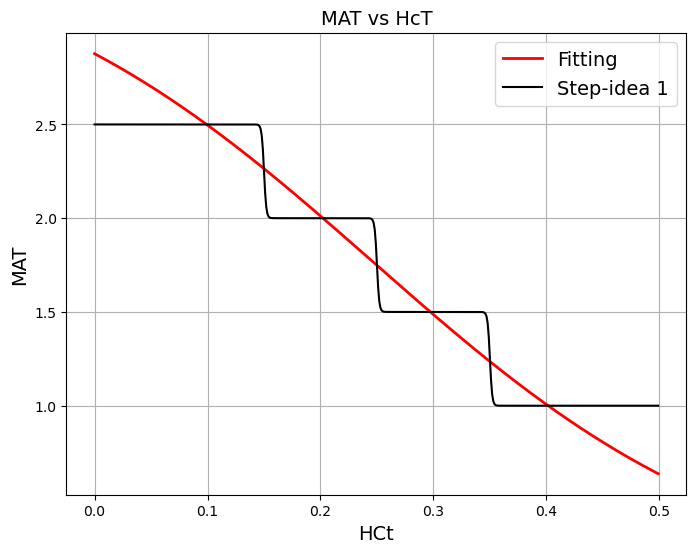

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(hkt, fit_time, color='red', linewidth=2, label='Fitting')
ax.plot(hkt, 1+step_1+step_2+step_3,color='black', label='Step-idea 1')

ax.set_xlabel('HCt', fontsize=14)
ax.set_ylabel('MAT', fontsize=14)
ax.set_title('MAT vs HcT', fontsize=14)
ax.grid(True)
ax.legend(loc='best', fontsize=14)
plt.show()

## Test Hill Kinetics for EPO

In [34]:
def hill_func(x, a, k, r)-> list:
    return a/(1+k*x**r)

hb = np.arange(7.5, 16.5, 0.01)

vals = hill_func(hb, 15600, 0.0382, 6.96)**(-1)
vals2 = hill_func(hb, 7374.146280948379, 9.99596376311406, 2.3576028642068314)**(-1)

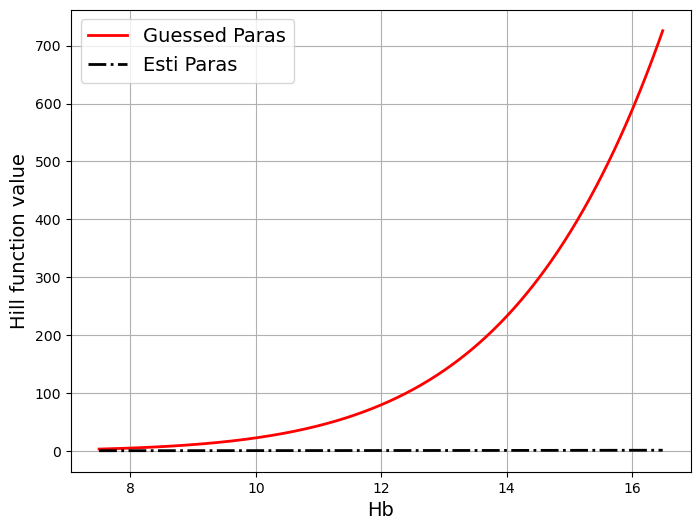

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(hb, vals, color='red', linewidth=2, label='Guessed Paras')
ax.plot(hb, vals2, color='black', linewidth=2, ls='-.',label='Esti Paras')

#ax.plot(hkt, 1+step_1+step_2+step_3,color='black', label='Step-idea 1')

ax.set_xlabel('Hb', fontsize=14)
ax.set_ylabel('Hill function value', fontsize=14)
#ax.set_title('MAT vs HKT', fontsize=14)
ax.grid(True)
ax.legend(loc='best', fontsize=14)
plt.show()

## Plot of haptoglobin function for BH-haemolysis

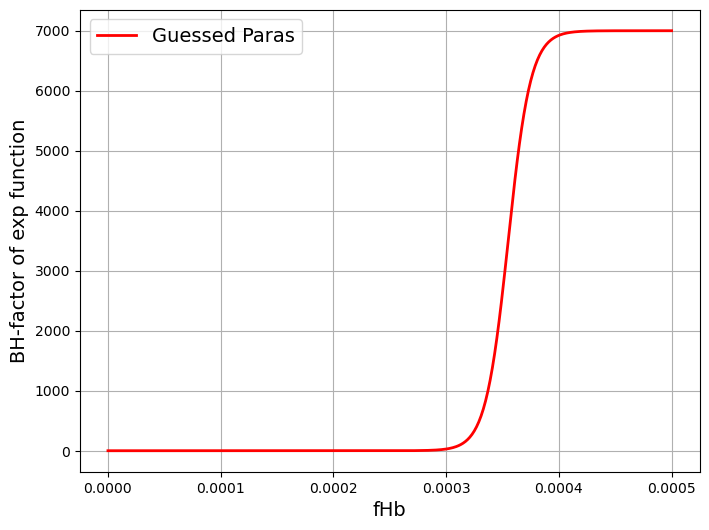

In [10]:
def hapto_func(fHb):
    fHb_conc_0  =  0.01 
    M_Hb        = 64500                    # g/l, normalerweise unter 10 mg/L
    fHb_0       = 1000* fHb_conc_0 / M_Hb  # mmol/l
    par1_fHb    = 1e5
    par2_fHb    = 2e-4
    switch_fHb  = 7000

    return switch_fHb / (1+np.exp(-par1_fHb * (fHb-par2_fHb-fHb_0)))
fHb = np.arange(0,5e-4,1e-6)
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fHb, hapto_func(fHb), color='red', linewidth=2, label='Guessed Paras')
#ax.plot(hkt, 1+step_1+step_2+step_3,color='black', label='Step-idea 1')

ax.set_xlabel('fHb', fontsize=14)
ax.set_ylabel('BH-factor of exp function', fontsize=14)
#ax.set_title('MAT vs HKT', fontsize=14)
ax.grid(True)
ax.legend(loc='best', fontsize=14)
plt.show()